In [140]:
import pickle
with open('./models_res/cyberleninka1/cyberleninka1_res_three_parts_without_center.pkl', 'rb') as f:
#with open('./models_res/cyberleninka1/cyberleninka1_res_sigma_half.pkl', 'rb') as f:
    res = pickle.load(f)

In [38]:
import numpy as np

In [145]:
import os

file = 'informatics.txt'

path = './dicts'
with open(os.path.join(path, file), 'r', encoding='utf8') as f:
    words = preproc(f.read())
    
for i, el in enumerate(res['3']):
    print('********************')
    print(i)
    print('********************')
    for word in el:
        if word in words:
            print(word)

********************
0
********************
документ
программа
служба
заём
задача
запрос
пользователь
протокол
данных
процедура
администратор
система
адрес
число
средство
устройство
блокировка
ошибка
класс
посещение
параметр
метод
словарь
передача
функция
ход
откат
ссылка
аргумент
помощь
прерывание
трафик
исключение
вызов
сценарий
гонка
перегрузка
объект
очередь
ярлык
структура
реплика
версия
схема
роль
письмо
программист
высказывание
********************
1
********************
превосходство
свойство
память
выражение
слово
представление
демон
символ
мир
********************
2
********************
текстура
кристалл
нить
дерево
кольцо
панель
консоль
цилиндр
облако
шрифт
зеркало
клавиша
туннель
миниатюра
лог
ветка
экран
контейнер
полигон
червь
диск
карта
********************
3
********************
куча
обои
грызун
блокнот
порт
боб
ящик
мышка
карман
мамка
зоопарк
транспорт
книжка
машина
магазин
********************
4
********************
обучение
презентация
навигация
нормализация
интернац

In [148]:
for i, clust in enumerate(res['5']):
    print('**********')
    print(i)
    print('----------')
    print(', '.join([w.split('_')[0] for w in clust[:90:3]]))
    print('----------')
    print(', '.join([w.split('_')[0] for w in clust[-90::3]]))
    print('**********')

**********
0
----------
услуга, бизнес, бюджет, заказ, информация, пользователь, производитель, поддержка, разработчик, управление, запрос, программа, хозяйство, администрация, проект, учреждение, собственность, задача, взнос, устройство, заявка, преимущество, орган, назначение, надзор, исполнитель, распоряжение, повинность, гражданин, протокол
----------
товар, потребность, продукт, работник, рабочий, нужда, средство, требование, предприниматель, торговля, решение, программист, цель, полномочие, владелец, проведение, деятельность, договор, администратор, усмотрение, пожертвование, жалование, посредник, отчёт, привилегия, ведомство, профессия, штат, поручение, проситель
**********
**********
1
----------
респондент, сведение, офицер, богослужение, перечень, прошение, звено, родственник, миссионер, знакомство, написание, сановник, община, указ, член, семья, внимание, класс, деятель, отчество, звание, издание, национальность, россия, провинция, ранг, представитель, письмо, принадлежность

In [102]:
for i, el in enumerate(res['']):
    if 'дольник' in el:
        print(i)

1


In [144]:
res['3'][3][:1000]#[-8000:-7000]

array(['наушник', 'ухват', 'кадка', 'каменка', 'тар', 'олени', 'эрмитаж',
       'баран', 'колокольчик', 'мазь', 'карп', 'стрелок', 'визг',
       'рассвет', 'карга', 'тундре', 'вьюга', 'кош', 'кум', 'окоп',
       'боксёр', 'яга', 'лопата', 'тарелка', 'чурка', 'переулок', 'окунь',
       'лопух', 'колядка', 'яичко', 'зимовка', 'матрёшка', 'погреб',
       'человечек', 'мул', 'лай', 'лан', 'страничка', 'кабина', 'гурт',
       'рёв', 'художница', 'фишка', 'мастерица', 'мина', 'бак', 'чугун',
       'пит', 'бер', 'динозавр', 'хромой', 'шапочка', 'тук', 'малиновка',
       'куча', 'муравей', 'гусли', 'чернильница', 'коробка', 'бай',
       'овчина', 'фея', 'умелец', 'дыня', 'поднос', 'салфетка', 'качели',
       'рубин', 'фонтанка', 'баллон', 'лосось', 'причал', 'бука', 'мед',
       'татарка', 'провод', 'сороки', 'соболь', 'табун', 'парк',
       'задница', 'прибор', 'полночь', 'морж', 'комплект', 'жилет',
       'сокол', 'столик', 'тетрадь', 'берёзка', 'птичка', 'рукавица',
       'кро

In [16]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [17]:
all_anim_list = []
anim_list = []
for clust in res['3']:
    clust_list = []
    for word in clust:
        parsed_anim = morph.parse(word.split('_')[0])[0].tag.animacy
        clust_list.append(parsed_anim)
        if parsed_anim == 'anim':
            all_anim_list.append(word.split('_')[0])
    anim_list.append(clust_list)

In [21]:
with open('animacy.txt', 'a', encoding='utf8') as f:
    f.write('\n'.join(all_anim_list))

In [5]:
morph.parse('жмурика')[0].tag.animacy

'anim'

In [6]:
anim_list = []
for clust in res['3']:
    clust_list = []
    for word in clust:
        clust_list.append(morph.parse(word.split('_')[0])[0].tag.animacy)
    anim_list.append(clust_list)

In [27]:
from collections import Counter
for i, el in enumerate(anim_list):
    anim_list[i] = Counter(el)

In [31]:
for i in anim_list:
    print(i['inan'], i['anim'], i[None])

1369 149 72
1285 289 17
1230 337 24
1473 78 40
864 534 192
786 641 165
1234 211 145
1283 227 82


100%|████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 117.61it/s]


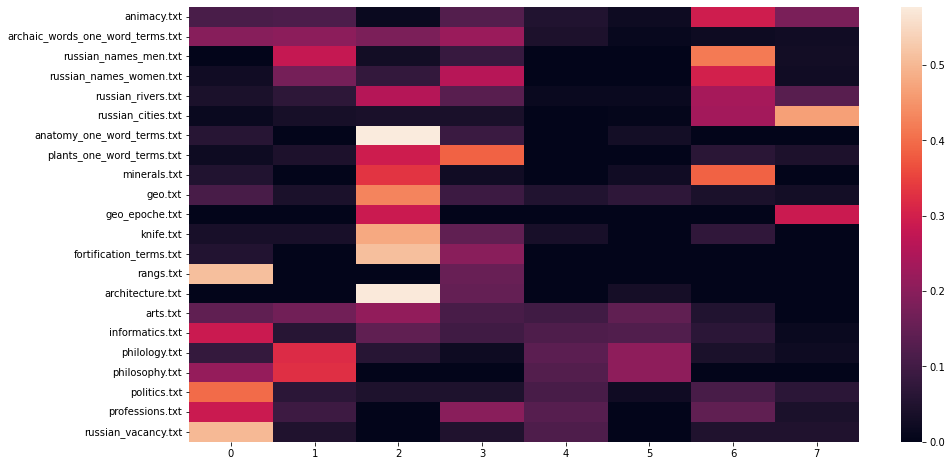

In [139]:
from algo import *
get_dict_histplot(res['3'])

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 19.70it/s]


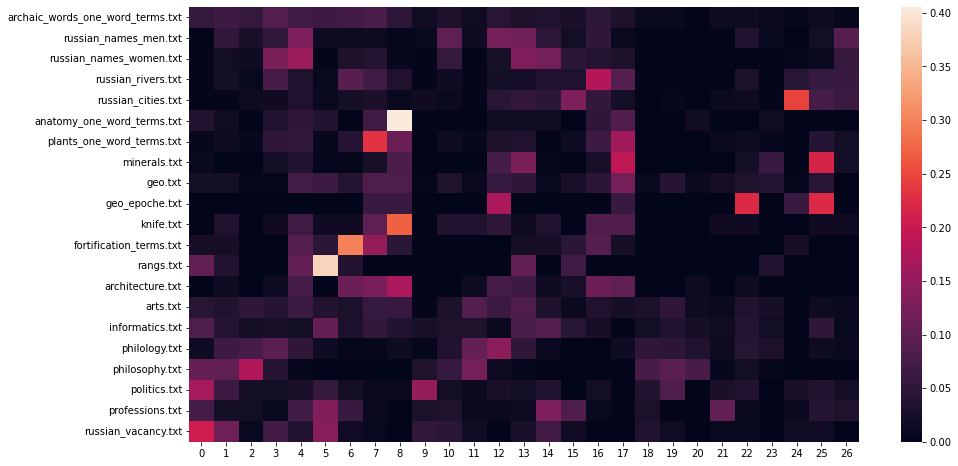

In [46]:
from algo import *
get_dict_histplot(res['3'])

In [50]:
res['4'][15]

array(['решетников', 'антипин', 'судаков', 'молдова', 'туров', 'татары',
       'рябинин', 'амуре', 'балков', 'балхаш', 'савин', 'тэк', 'ермолаев',
       'бурыкин', 'ведерников', 'кудымкар', 'могильников', 'пестицид',
       'зеленоград', 'ануфриев', 'бугульма', 'лебединский', 'грищенко',
       'фотовыставка', 'илек', 'дальневосточник', 'космодром', 'топонимы',
       'канев', 'бирск', 'теле', 'спиридонов', 'русанов', 'мурманск',
       'цтк', 'забелин', 'павлодар', 'бадахшан', 'ини', 'селигер',
       'цильма', 'военнопленные', 'абхазия', 'бакланов', 'мызников',
       'епископия', 'ижма', 'судебник', 'куйбышева', 'салаир',
       'ростелеком', 'секциях', 'гущин', 'березники', 'полуземлянка',
       'цны', 'вятки', 'владыкин', 'кричалка', 'октоих', 'алаш',
       'могильника', 'поволжья', 'алёшкин', 'полесья', 'книговыдача',
       'ихтиофауна', 'федосеев', 'мвт', 'телепрограмма', 'вов', 'фирсов',
       'хорезм', 'хальмг', 'казахстанец', 'каменского', 'воркуте',
       'лебединског

<AxesSubplot:>

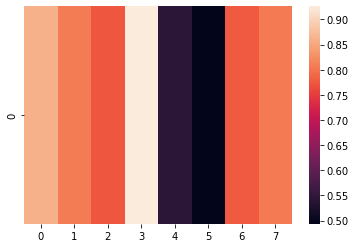

In [33]:
import seaborn as sns
sns.heatmap([[i['inan'] / (i['inan'] + i['anim'] + i[None]) for i in anim_list]])

<AxesSubplot:>

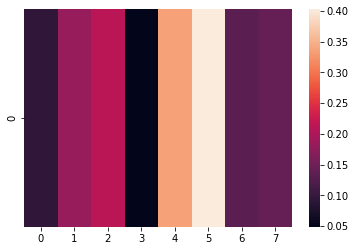

In [34]:
sns.heatmap([[i['anim'] / (i['inan'] + i['anim'] + i[None]) for i in anim_list]])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 97.20it/s]


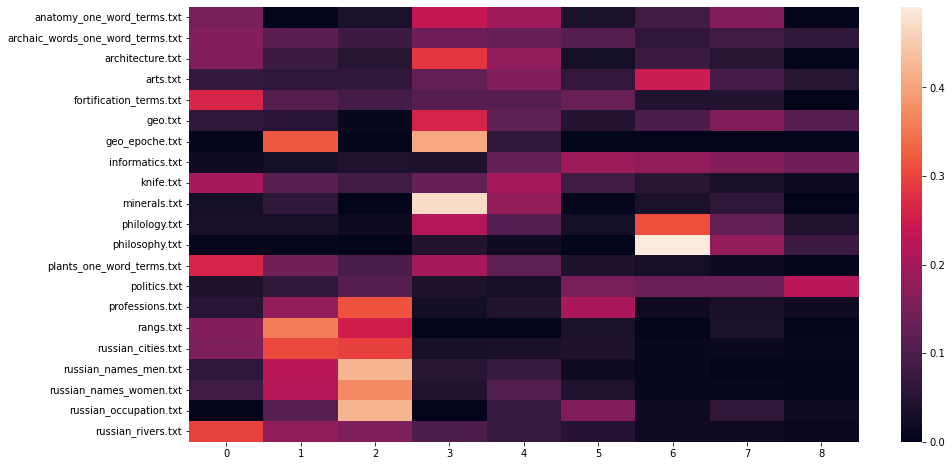

In [4]:
from algo import *
get_dict_histplot(res['2'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 103.95it/s]


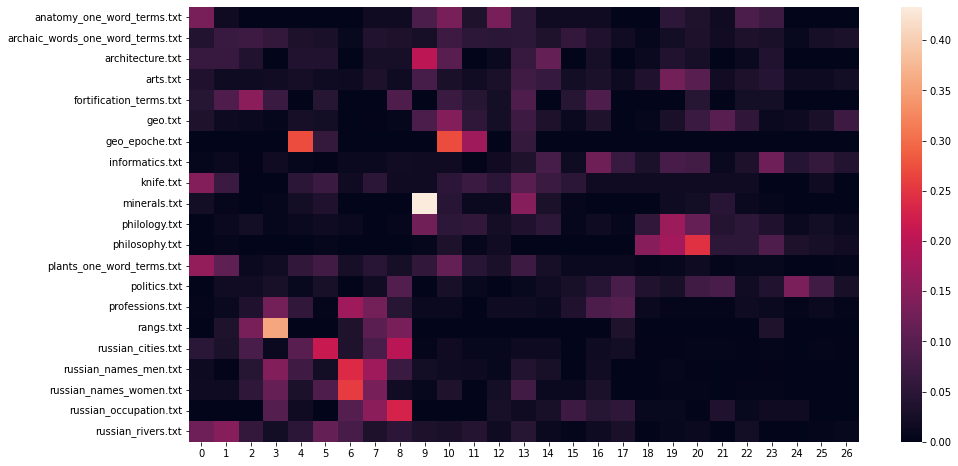

In [3]:
from algo import *
get_dict_histplot(res['3'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 109.93it/s]


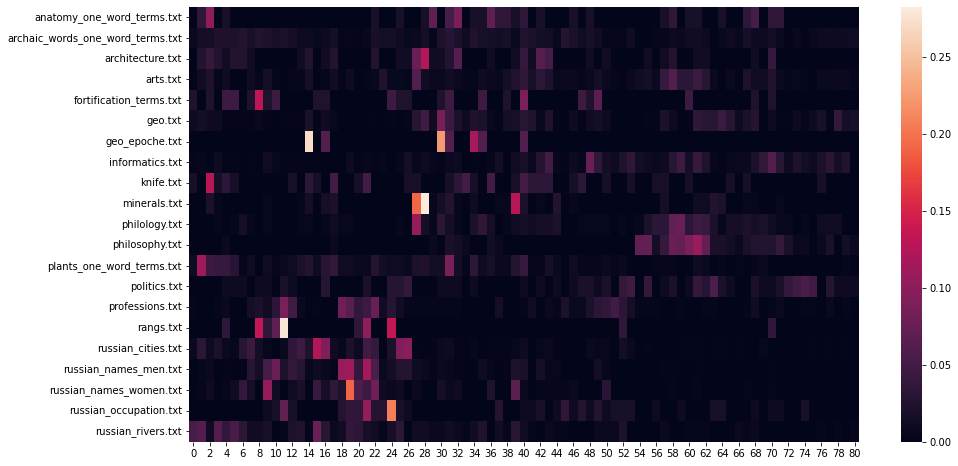

In [4]:
from algo import *
get_dict_histplot(res['4'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.79it/s]


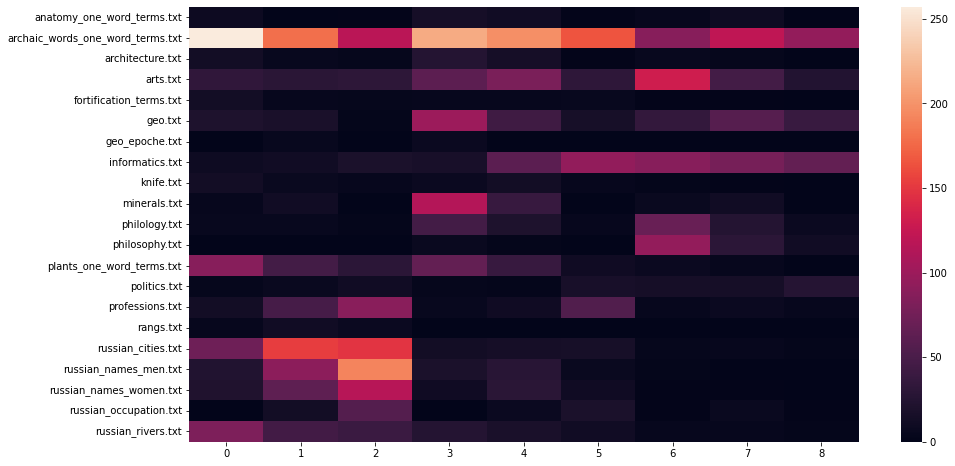

In [3]:
from algo import *
get_dict_histplot(res['2'])

In [16]:
res['4'][30]

['песок',
 'снег',
 'заполнителях',
 'пески',
 'суглинки',
 'обрыв',
 'песках',
 'кровлей',
 'цеолит',
 'терраса',
 'прослоями',
 'карбон',
 'мергель',
 'кальция',
 'марганец',
 'кобальт',
 'буря',
 'мука',
 'диатомит',
 'любовь',
 'зелень',
 'террасы',
 'греция',
 'колокольня',
 'гравием',
 'галькой',
 'урез',
 'вал',
 'гидрокарбонат',
 'ломоносов',
 'глинах',
 'венда',
 'течь',
 'карбонаты',
 'объёму',
 'детство',
 'сердце',
 'надвиг',
 'историк',
 'фосфор',
 'всход',
 'хребет',
 'вые',
 'песками',
 'прогибах',
 'опока',
 'опоки',
 'богослов',
 'оду',
 'покой',
 'барий',
 'галечник',
 'гряда',
 'впадение',
 'плод',
 'лагун',
 'дар',
 'фортран',
 'румб',
 'бура',
 'ставролит',
 'глин',
 'суглинках',
 'бугры',
 'средина',
 'лёсс',
 'концентрациями',
 'риф',
 'ракушечник',
 'туфы',
 'глыбами',
 'стронций',
 'восхищение',
 'ливень',
 'тропинка',
 'крутизной',
 'тацит',
 'россыпь',
 'аполлония',
 'радость',
 'гряды',
 'хомяков',
 'мхи',
 'счастие',
 'печали',
 'льдина',
 'утр',
 'изречени

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 102.94it/s]


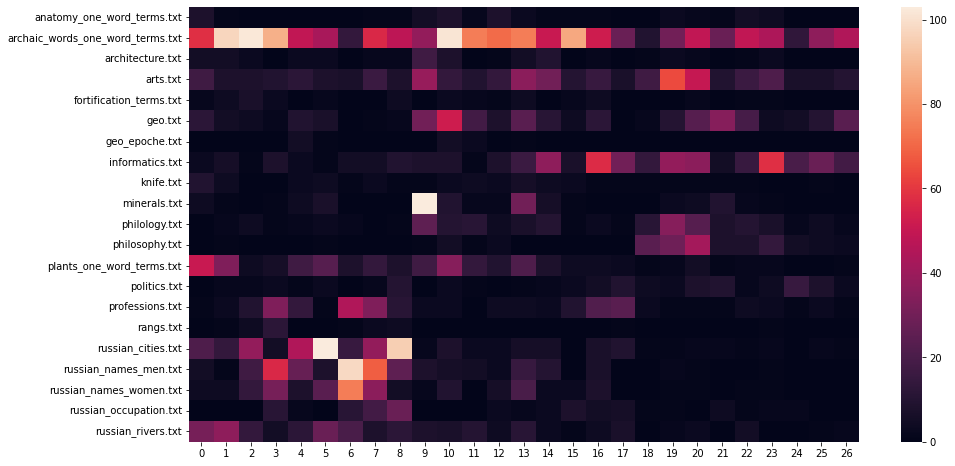

In [4]:
from algo import *
get_dict_histplot(res['3'])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 99.51it/s]


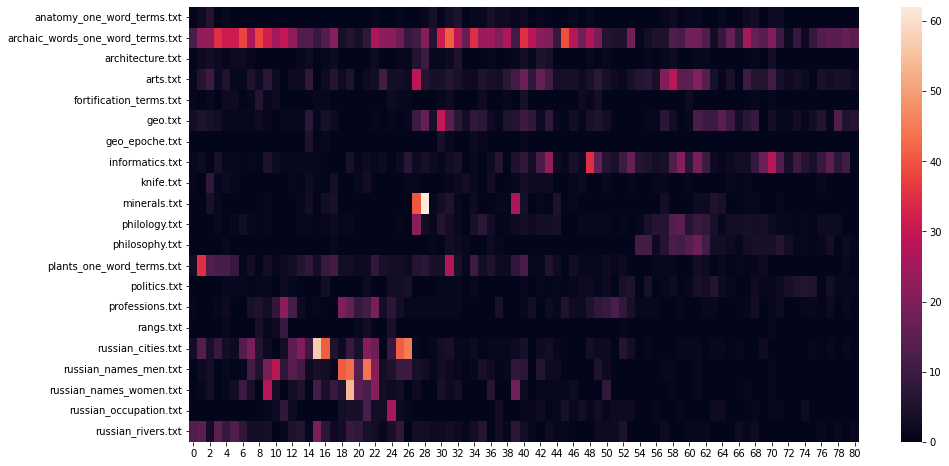

In [3]:
from algo import *
get_dict_histplot(res['4'])

100%|█████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 108.81it/s]


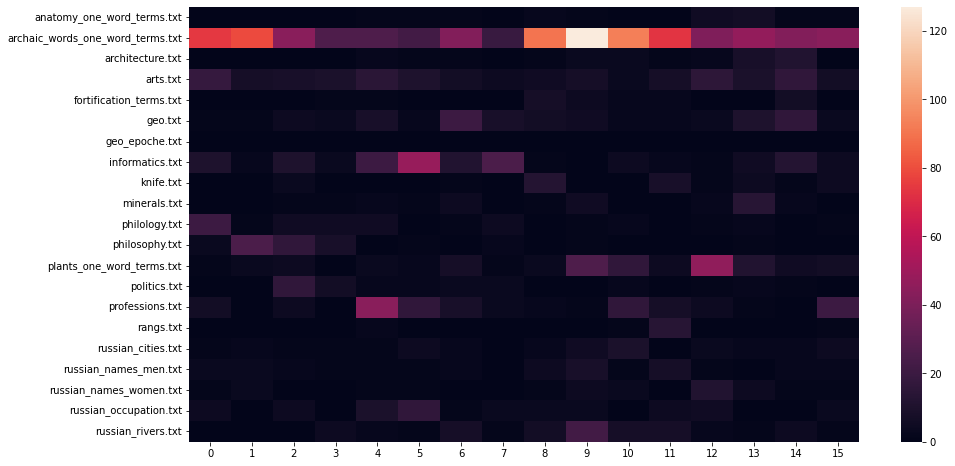

In [4]:
from algo import *
get_dict_histplot(res['4'])

In [8]:
with open('./dicts/archaic_words_one_word_terms.txt', 'r', encoding='utf8') as f:
    archaic_words = preproc(f.read())

In [10]:
for i, clust in enumerate(res['4'][:8]):
    print(i)
    for word in clust:
        word = word.split('_')[0]
        if word in archaic_words:
            print(word)
            
    print('***************\n')

0
замечание
отзыв
примечание
словесность
разбор
книга
беседа
публика
трактат
должность
уложение
неудовольствие
государь
стих
чин
соображение
этикет
лексикон
язык
посланник
доверенность
упущение
имение
узаконение
погрешность
изъяснение
звание
содержание
купечество
повеление
предписание
штрих
рассуждение
препинание
стихотворство
переложение
величество
учитель
шляхетство
достоинство
панегирик
слово
пререкание
правило
предположение
разыскание
честь
вольность
тот
речение
длиннота
повествователь
наклонение
польза
благорасположение
недоимка
кой
тяжба
согласие
благоусмотрение
повторение
художество
благочиние
неуменье
краткий
сочинительство
вид
начертание
соизволение
немилость
положенье
присутствие
пеня
противу
***************

1
натура
заточение
любомудрие
труд
мерило
недостоинство
убиение
существенность
уничижение
смиренномудрие
слышание
несчастие
кесарь
дотоле
наш
судия
магнетизм
смысл
позыв
преуспеяние
паства
прелюбодеяние
клятва
ревность
седмица
самый
мужество
причастник
премудрость
состоя

In [10]:
res['4'][11]

array(['орловец_NOUN', 'повозка_NOUN', 'подьячий_NOUN', 'каюра_NOUN',
       'просека_NOUN', 'ихний_NOUN', 'животина_NOUN', 'егор_NOUN',
       'батенька_NOUN', 'теплушка_NOUN', 'ездка_NOUN', 'собака_NOUN',
       'лентяй_NOUN', 'подмога_NOUN', 'михайла_NOUN', 'егерь_NOUN',
       'дьячка_NOUN', 'опушка_NOUN', 'тятя_NOUN', 'жердь_NOUN',
       'степенство_NOUN', 'брательник_NOUN', 'приступка_NOUN',
       'караулка_NOUN', 'тятенька_NOUN', 'капельмейстер_NOUN',
       'перебранка_NOUN', 'землячок_NOUN', 'подпасок_NOUN', 'сенцы_NOUN',
       'букварь_NOUN', 'берейтор_NOUN', 'куды_NOUN', 'матка_NOUN',
       'гребец_NOUN', 'белоручка_NOUN', 'упряжь_NOUN', 'недолга_NOUN',
       'гордей_NOUN', 'ярыг_NOUN', 'песенник_NOUN', 'гуж_NOUN',
       'боров_NOUN', 'бабка_NOUN', 'бабки_NOUN', 'ревком_NOUN',
       'малый_NOUN', 'картежник_NOUN', 'объездчик_NOUN', 'цеп_NOUN',
       'крылечко_NOUN', 'выпороть_NOUN', 'шасть_NOUN', 'валек_NOUN',
       'дворянчик_NOUN', 'сибиряк_NOUN', 'степанида_NOUN'

In [36]:
with open('REVERSE.txt', 'r', encoding='utf8') as f:
    reverse_words = f.read().split('\n')

In [43]:
import re

without_words = []
for word in reverse_words:
    if re.match('^без.+(и|ы)й$', word):
        without_words.append(word)

In [48]:
without_words[40][-3]

'н'

In [49]:
ailen_words = []
non_ailen_wors = []
for word in without_words:
    if word[-3] == 'н':
        ailen_words.append(word)
    else:
        non_ailen_wors.append(word)

In [50]:
non_ailen_wors

['безногий',
 'безрогий',
 'безликий',
 'безрукий',
 'безъязыкий',
 'безверхий',
 'безухий',
 'бездействующий',
 'беззубый',
 'безглавый',
 'безрасчетливый',
 'беззастенчивый',
 'безытоговый',
 'безвизовый',
 'безголовый',
 'безбровый',
 'безыскровый',
 'безрельсовый',
 'безбородый',
 'безглазый',
 'безмозглый',
 'безволосый',
 'безголосый',
 'безносый',
 'безусый',
 'безлистый',
 'безостый']

In [ ]:
import seaborn as sns
sns.heatmap()

In [8]:
len(res['3'][1])

1591